In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import gaussian_kde

In [2]:
# Opening flow cytometry data and subsetting them for only the columns I need -- g1, g2, g3
g1_fcm = pd.read_feather('g1_fcm.feather')
g1_fcm = g1_fcm[['pop', 'norm.scatter', 'norm.red', 'norm.orange', 'station', 'lat', 'depth', 'replicate']]

g2_fcm = pd.read_feather('g2_fcm.feather')
g2_fcm = g2_fcm[['pop', 'norm.scatter', 'norm.red', 'norm.orange', 'station', 'lat', 'depth', 'replicate']]

g3_fcm = pd.read_csv('g3_fcm.csv')
g3_fcm = g3_fcm[['pop', 'norm.scatter', 'norm.red', 'norm.orange', 'station', 'lat', 'depth', 'replicate']]

C:\Users\User\AppData\Local\Temp\ipykernel_27116\476692746.py:8: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  g3_fcm = pd.read_csv('g3_fcm.csv')


In [3]:
# Subsetting the dataframes so that I get only Pro and only 1 replica
g1_pro_fcm = g1_fcm.loc[(g1_fcm['pop'] == 'prochloro') & (g1_fcm['replicate'] == 'A')]
g2_pro_fcm = g2_fcm.loc[(g2_fcm['pop'] == 'prochloro') & (g2_fcm['replicate'] == 'A')]
g3_pro_fcm = g3_fcm.loc[(g3_fcm['pop'] == 'prochloro') & (g3_fcm['replicate'] == ' A')]

In [4]:
# Rounding the latitudes and depths of each dataset
g1_r_lat = g1_pro_fcm['lat'].round()
g1_pro_fcm['rdepth'] = g1_pro_fcm['depth'].apply(lambda x: round(x/10) * 10)
g1_pro_fcm.insert(6, 'rlat', g1_r_lat)

g2_r_lat = g2_pro_fcm['lat'].round()
g2_pro_fcm['rdepth'] = g2_pro_fcm['depth'].apply(lambda x: round(x/10) * 10)
g2_pro_fcm.insert(6, 'rlat', g2_r_lat)

g3_r_lat = g3_pro_fcm['lat'].round()
g3_pro_fcm['rdepth'] = g3_pro_fcm['depth'].apply(lambda x: round(x/10) * 10)
g3_pro_fcm.insert(5, 'rlat', g3_r_lat)

C:\Users\User\AppData\Local\Temp\ipykernel_27116\2415152899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1_pro_fcm['rdepth'] = g1_pro_fcm['depth'].apply(lambda x: round(x/10) * 10)
C:\Users\User\AppData\Local\Temp\ipykernel_27116\2415152899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2_pro_fcm['rdepth'] = g2_pro_fcm['depth'].apply(lambda x: round(x/10) * 10)
C:\Users\User\AppData\Local\Temp\ipykernel_27116\2415152899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [5]:
# Grabbing rounded and sorted lats and depths of each gradent
g1_lats = pd.unique(g1_pro_fcm['rlat'])
g1_lats = np.sort(g1_lats)
g1_depths = pd.unique(g1_pro_fcm['rdepth'])
g1_depths = np.sort(g1_depths)

g2_lats = pd.unique(g2_pro_fcm['rlat'])
g2_lats = np.sort(g2_lats)
g2_depths = pd.unique(g2_pro_fcm['rdepth'])
g2_depths = np.sort(g2_depths)

g3_lats = pd.unique(g3_pro_fcm['rlat'])
g3_lats = np.sort(g3_lats)
g3_depths = pd.unique(g3_pro_fcm['rdepth'])
g3_depths = np.sort(g3_depths)

In [6]:
# Setting a color map to correlate with the different latitudes -- only for g1 and g2 since g3 is all at 5m
all_lats = np.concatenate((g1_lats, g2_lats, g3_lats))
all_lats = np.unique(all_lats)
all_lats = np.sort(all_lats)

# Create a color palette with enough colors for each unique latitude
all_lat_palette = sns.color_palette("viridis", n_colors = len(all_lats))

# Create a dictionary to map each latitude to a unique color
all_lat_color_map = {lat: all_lat_palette[i] for i, lat in enumerate(all_lats)}

In [7]:
for lat in g1_lats:
    fcm_df = g1_pro_fcm.loc[g1_pro_fcm['rlat'] == lat]
    scatter = np.log(fcm_df['norm.scatter'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(scatter, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Forward Scatter (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 1 - Forward Scatter')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [8]:
for lat in g1_lats:
    fcm_df = g1_pro_fcm.loc[g1_pro_fcm['rlat'] == lat]
    red = np.log(fcm_df['norm.red'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(red, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Red Fluorescent (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 1 - Red')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [9]:
for lat in g1_lats:
    fcm_df = g1_pro_fcm.loc[g1_pro_fcm['rlat'] == lat]
    orange = np.log(fcm_df['norm.orange'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(orange, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Orange Fluorescent (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 1 - Orange')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [10]:
for lat in g2_lats:
    fcm_df = g2_pro_fcm.loc[g2_pro_fcm['rlat'] == lat]
    scatter = np.log(fcm_df['norm.scatter'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(scatter, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Forward Scatter (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 2 - Forward Scatter')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [11]:
for lat in g2_lats:
    fcm_df = g2_pro_fcm.loc[g2_pro_fcm['rlat'] == lat]
    red = np.log(fcm_df['norm.red'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(red, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Red Fluorescent (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 2 - Red')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [12]:
for lat in g2_lats:
    fcm_df = g2_pro_fcm.loc[g2_pro_fcm['rlat'] == lat]
    orange = np.log(fcm_df['norm.orange'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(orange, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Orange Fluorescent (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 2 - Orange')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [13]:
for lat in g3_lats:
    fcm_df = g3_pro_fcm.loc[g3_pro_fcm['rlat'] == lat]
    scatter = np.log(fcm_df['norm.scatter'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(scatter, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Forward Scatter (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 3 - Forward Scatter')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [14]:
for lat in g3_lats:
    fcm_df = g3_pro_fcm.loc[g3_pro_fcm['rlat'] == lat]
    red = np.log(fcm_df['norm.red'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(red, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Red Fluorescent (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 3 - Red')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [15]:
for lat in g3_lats:
    fcm_df = g3_pro_fcm.loc[g3_pro_fcm['rlat'] == lat]
    orange = np.log(fcm_df['norm.orange'].to_list())
    depth = fcm_df['depth'].to_list()
#     plt.plot(orange, depth, color = all_lat_color_map[lat], label = lat)
    
# plt.xlabel('Orange Fluorescent (log)')
# plt.ylabel('Depth')
# plt.title('Gradient 3 - Orange')
# plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')
# plt.gca().invert_yaxis()
# plt.gca().xaxis.set_ticks_position('top')
# plt.gca().xaxis.set_label_position('top')

In [16]:
# obtaining the lats and depths that correspond and has data
_g1_lats = []
_g1_depths = []

for lat in g1_lats:
    for depth in g1_depths:
        fcm_df = g1_pro_fcm.loc[(g1_pro_fcm['rdepth'] == depth) & (g1_pro_fcm['rlat'] == lat)]
        if len(fcm_df) == 0:
            break
        else:
            _g1_lats.append(lat)
            _g1_depths.append(depth)

# organizing the lats and depths of g1
fg_g1_lats = pd.unique(_g1_lats)
fg_g1_lats = np.sort(fg_g1_lats)

fg_g1_depths = pd.unique(_g1_depths)
fg_g1_depths = np.sort(fg_g1_depths)

C:\Users\User\AppData\Local\Temp\ipykernel_27116\88100666.py:15: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fg_g1_lats = pd.unique(_g1_lats)
C:\Users\User\AppData\Local\Temp\ipykernel_27116\88100666.py:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fg_g1_depths = pd.unique(_g1_depths)


In [17]:
# creating an empty dataframe
fg_g1 = pd.DataFrame()

# making a dataframe with only the lats and depths that have data
for lat in fg_g1_lats:
    for depth in fg_g1_depths:
        fcm_df = g1_pro_fcm.loc[(g1_pro_fcm['rdepth'] == depth) & (g1_pro_fcm['rlat'] == lat)]
        if len(fcm_df) == 0:
            break
        else:
            fg_g1 = pd.concat([fg_g1, fcm_df], ignore_index = True)

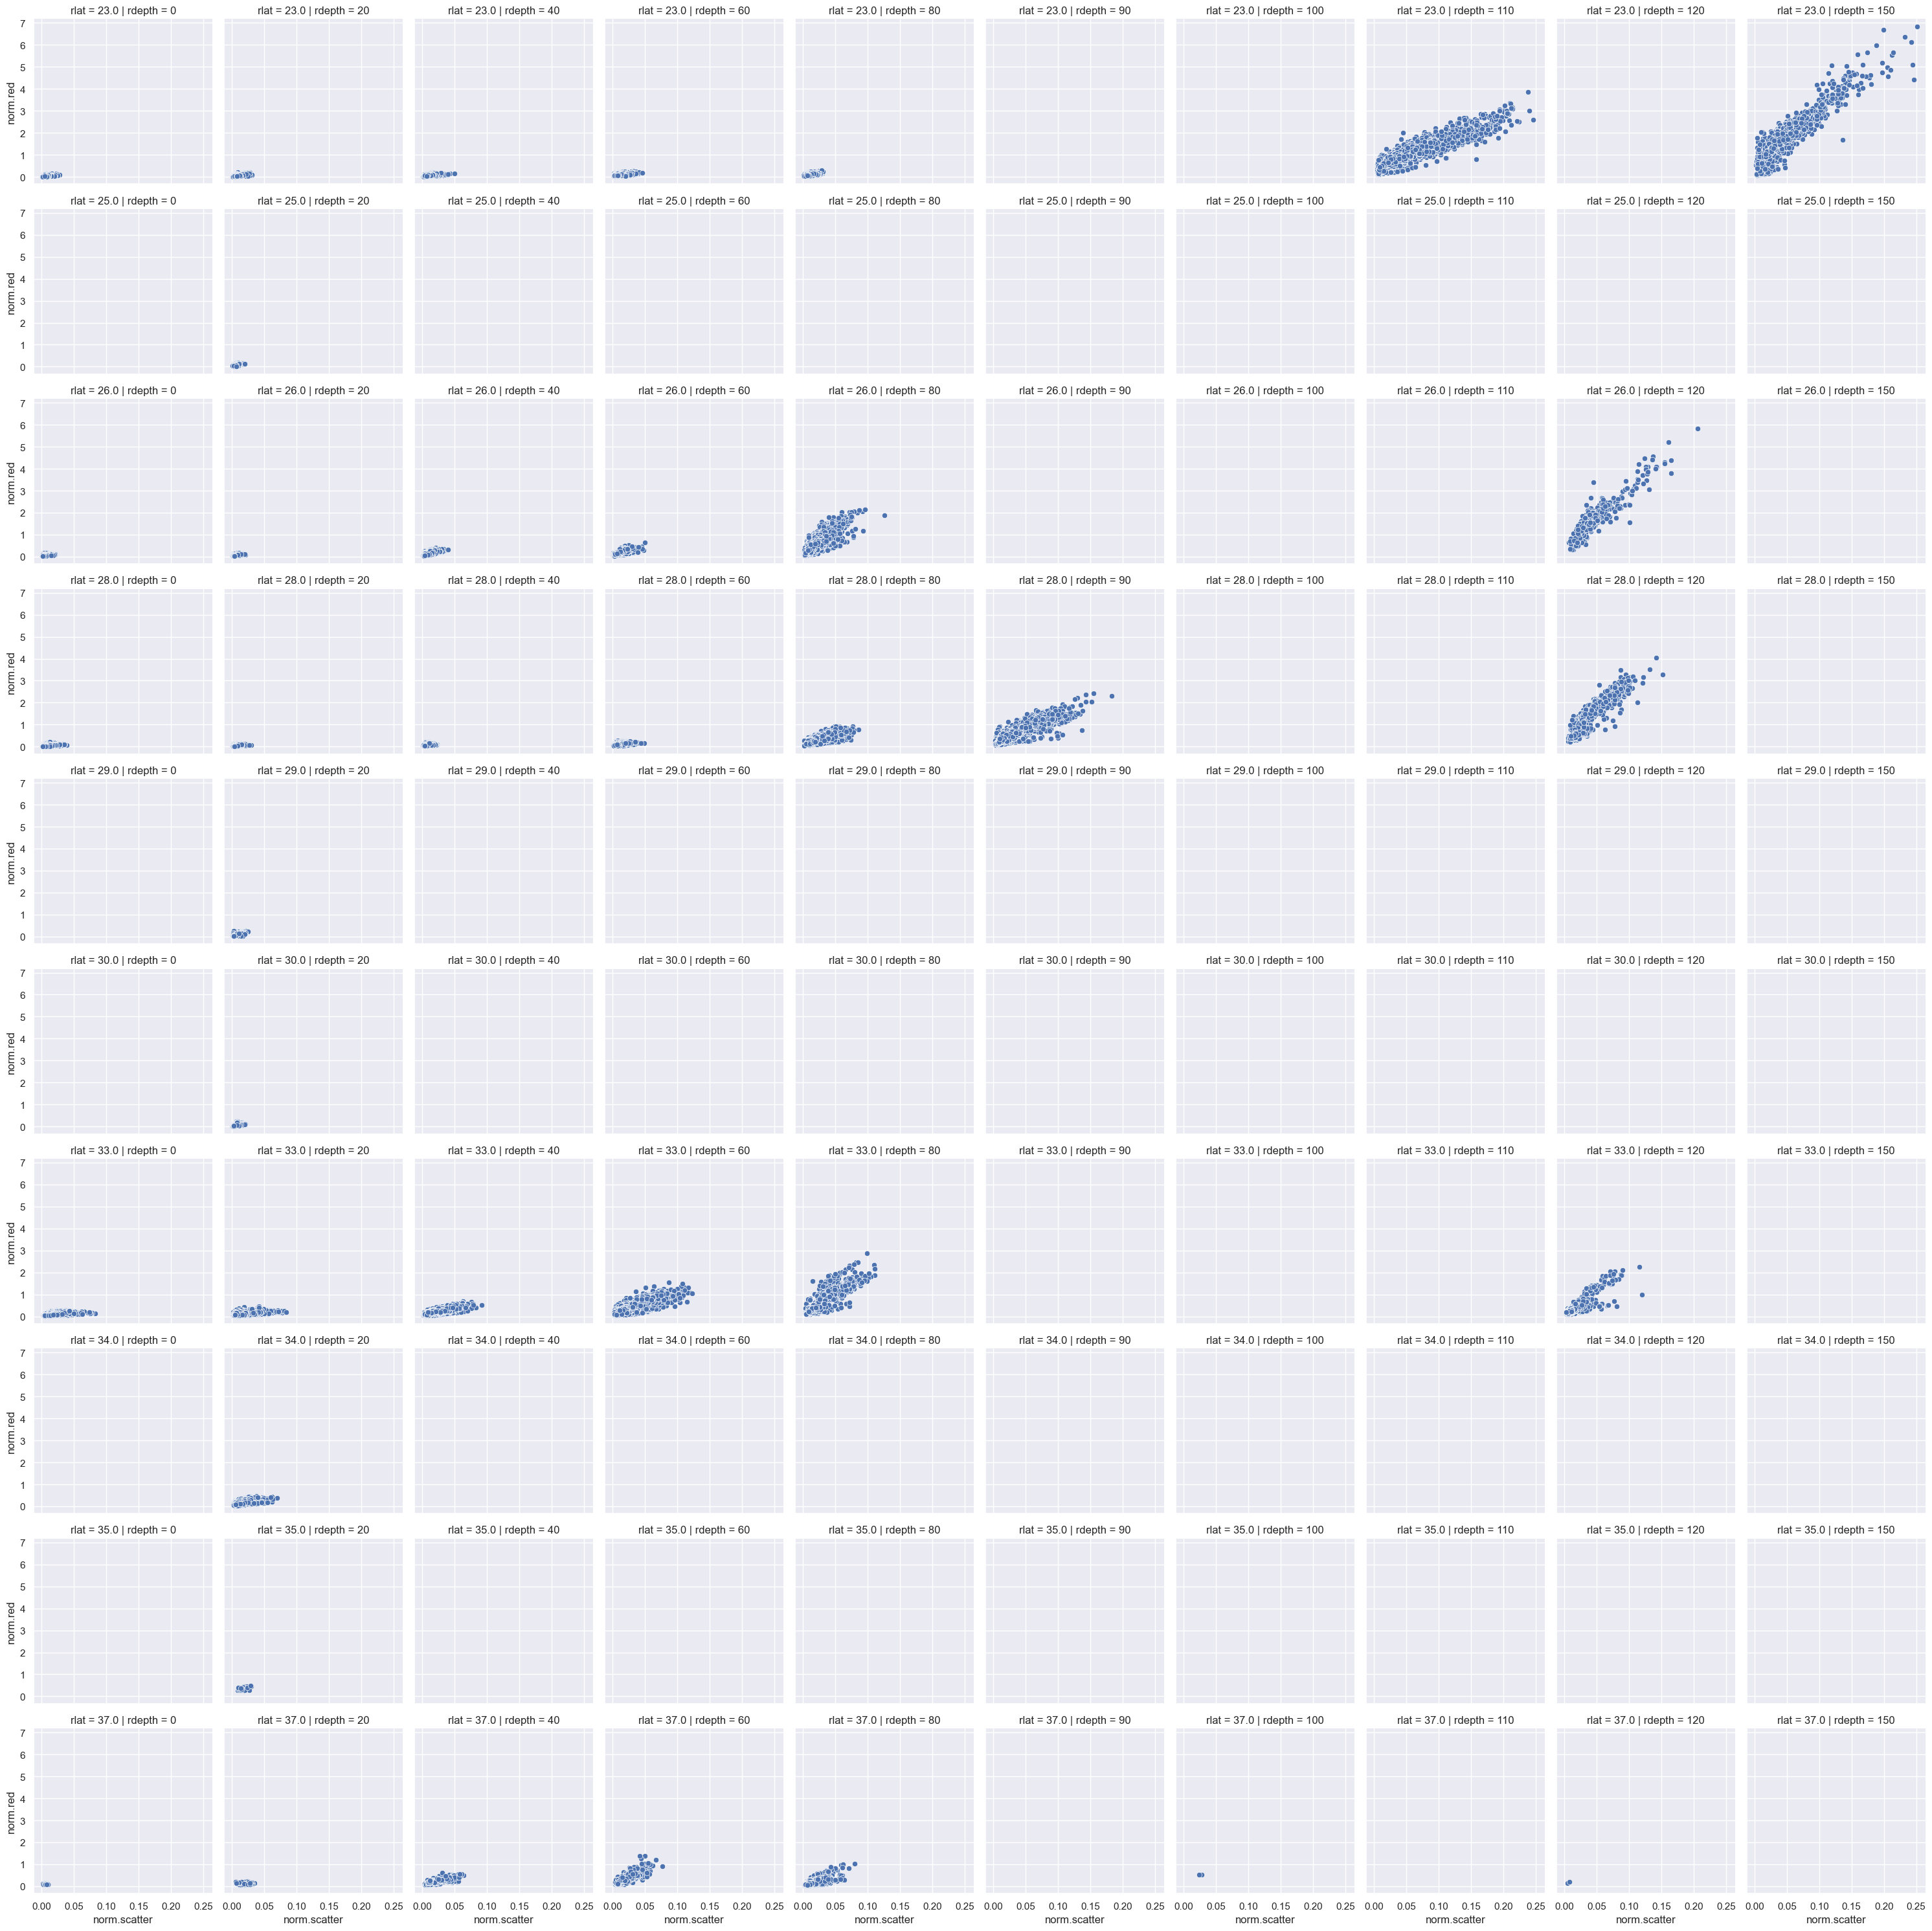

In [18]:
# gradient 1 information for FacetGrid
g1_all = sns.FacetGrid(g1_pro_fcm, col = 'rdepth', row = 'rlat')
g1_all.map(sns.scatterplot, 'norm.scatter', 'norm.red')

In [19]:
def density_scatter(data, color, **kwargs):
    x = data["norm.scatter"]
    y = data["norm.red"]

    # Compute the point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density for nicer plotting
    idx = z.argsort()
    x, y, z = x.iloc[idx], y.iloc[idx], z[idx]

    # Use scatterplot from seaborn or matplotlib
    plt.scatter(x, y, c=z, cmap="viridis", s=20, **kwargs)

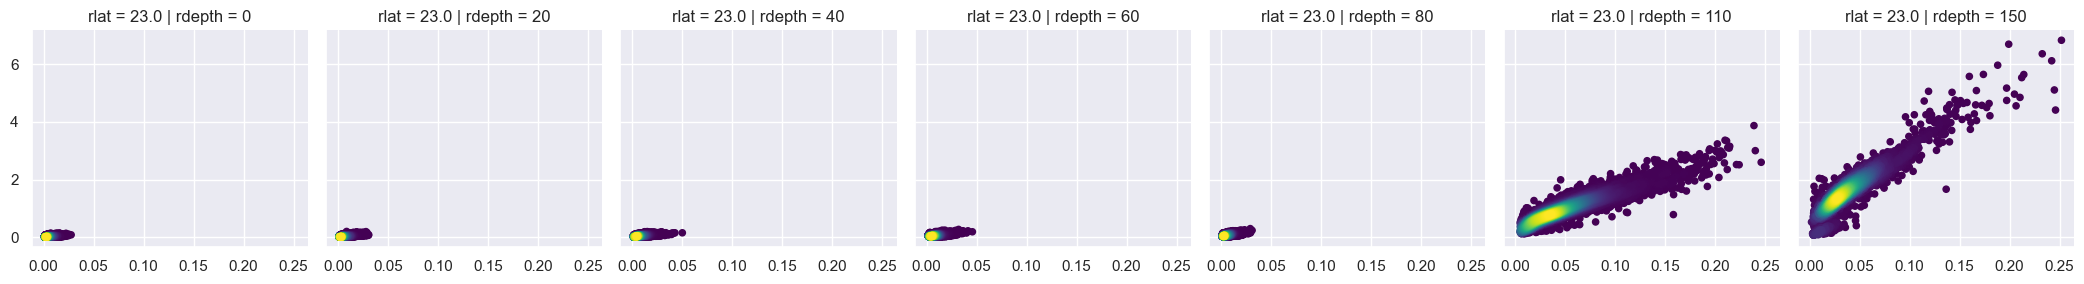

In [20]:
# plotting scatter vs red at latitude 23
lat_23_g1 = g1_pro_fcm.loc[g1_pro_fcm['rlat'] == 23]

g1_23_depths = pd.unique(lat_23_g1['rdepth'])
fg_23_g1 = sns.FacetGrid(lat_23_g1, col = 'rdepth', row = 'rlat')
fg_23_g1.map_dataframe(density_scatter)

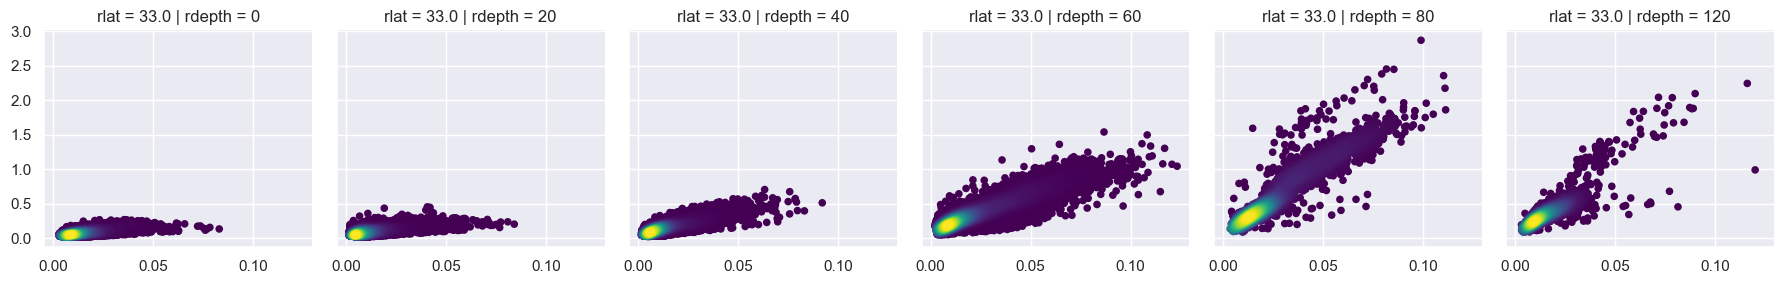

In [21]:
# plotting scatter vs red at latitude 33
lat_33_g1 = g1_pro_fcm.loc[g1_pro_fcm['rlat'] == 33]

g1_33_depths = pd.unique(lat_33_g1['rdepth'])
fg_33_g1 = sns.FacetGrid(lat_33_g1, col = 'rdepth', row = 'rlat')
fg_33_g1.map_dataframe(density_scatter)

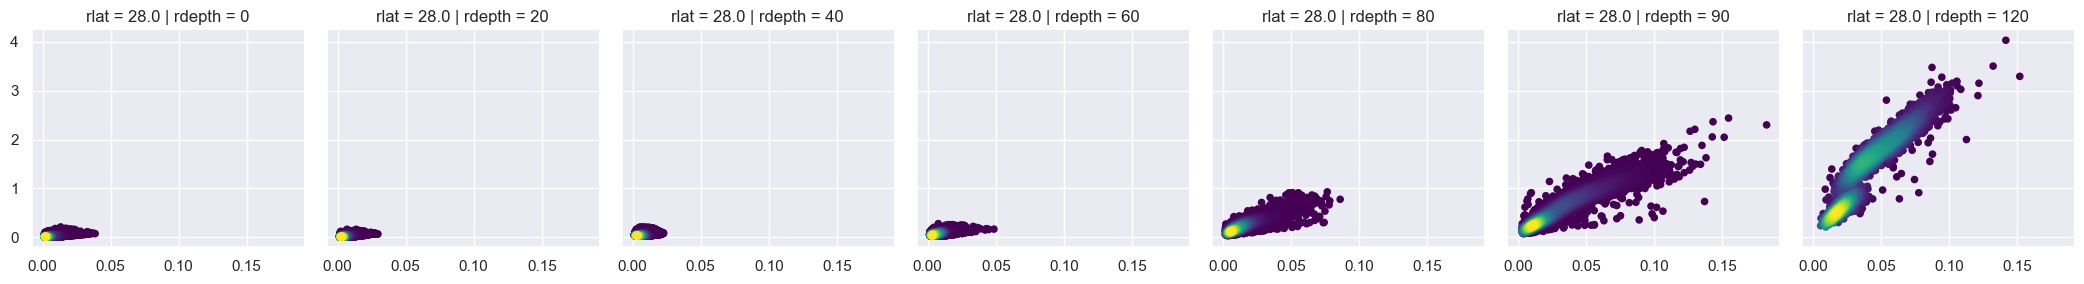

In [22]:
# plotting scatter vs red at latitude 28
lat_28_g1 = g1_pro_fcm.loc[g1_pro_fcm['rlat'] == 28]

g1_28_depths = pd.unique(lat_28_g1['rdepth'])
fg_28_g1 = sns.FacetGrid(lat_28_g1, col = 'rdepth', row = 'rlat')
fg_28_g1.map_dataframe(density_scatter)

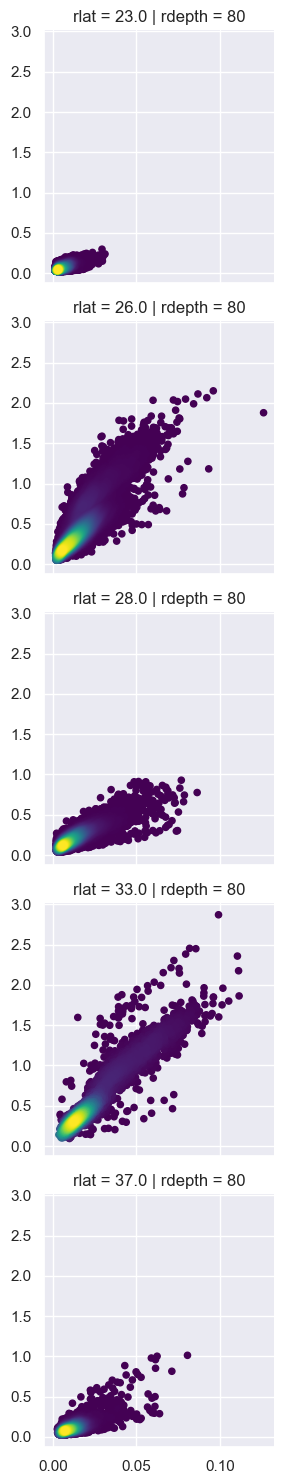

In [23]:
# plotting scatter vs red at depth 80
depth_80_g1 = g1_pro_fcm.loc[g1_pro_fcm['rdepth'] == 80]

g1_80_lats = pd.unique(depth_80_g1['rlat'])
fg_80_g1 = sns.FacetGrid(depth_80_g1, col = 'rdepth', row = 'rlat')
fg_80_g1.map_dataframe(density_scatter)

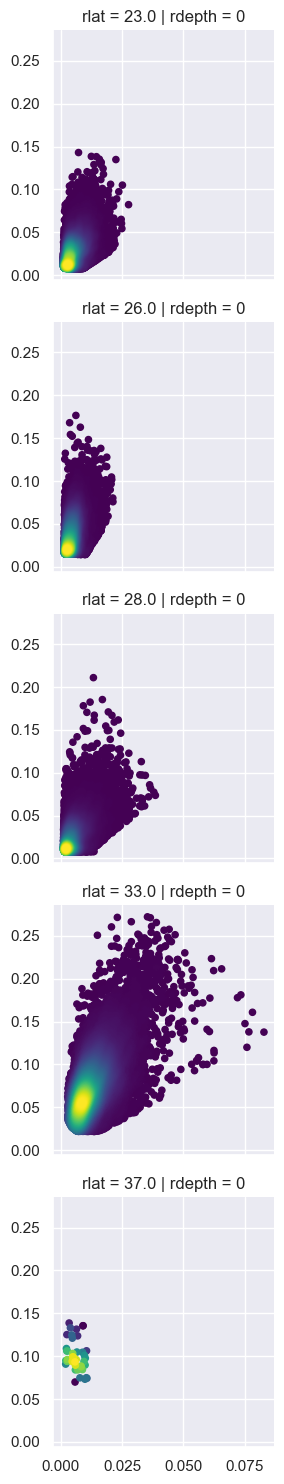

In [24]:
# plotting scatter vs red at depth 0
depth_0_g1 = g1_pro_fcm.loc[g1_pro_fcm['rdepth'] == 0]

g1_0_lats = pd.unique(depth_0_g1['rlat'])
fg_0_g1 = sns.FacetGrid(depth_0_g1, col = 'rdepth', row = 'rlat')
fg_0_g1.map_dataframe(density_scatter)

In [25]:
# gradient 1 information for FacetGrid
# g1 = sns.FacetGrid(fg_g1, col = 'rdepth', row = 'rlat')
# g1.map(sns.scatterplot, 'norm.scatter', 'norm.red')

In [26]:
# obtaining the lats and depths that correspond and has data
_g2_lats = []
_g2_depths = []

for lat in g2_lats:
    for depth in g2_depths:
        fcm_df = g2_pro_fcm.loc[(g2_pro_fcm['rdepth'] == depth) & (g2_pro_fcm['rlat'] == lat)]
        if len(fcm_df) == 0:
            break
        else:
            _g2_lats.append(lat)
            _g2_depths.append(depth)

# organizing the lats and depths of g1
fg_g2_lats = pd.unique(_g2_lats)
fg_g2_lats = np.sort(fg_g2_lats)

fg_g2_depths = pd.unique(_g2_depths)
fg_g2_depths = np.sort(fg_g2_depths)

C:\Users\User\AppData\Local\Temp\ipykernel_27116\3893872573.py:15: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fg_g2_lats = pd.unique(_g2_lats)
C:\Users\User\AppData\Local\Temp\ipykernel_27116\3893872573.py:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fg_g2_depths = pd.unique(_g2_depths)


In [27]:
# creating an empty dataframe
fg_g2 = pd.DataFrame()

# making a dataframe with only the lats and depths that have data
for lat in fg_g2_lats:
    for depth in fg_g2_depths:
        fcm_df = g2_pro_fcm.loc[(g2_pro_fcm['rdepth'] == depth) & (g2_pro_fcm['rlat'] == lat)]
        if len(fcm_df) == 0:
            break
        else:
            fg_g2 = pd.concat([fg_g2, fcm_df], ignore_index = True)

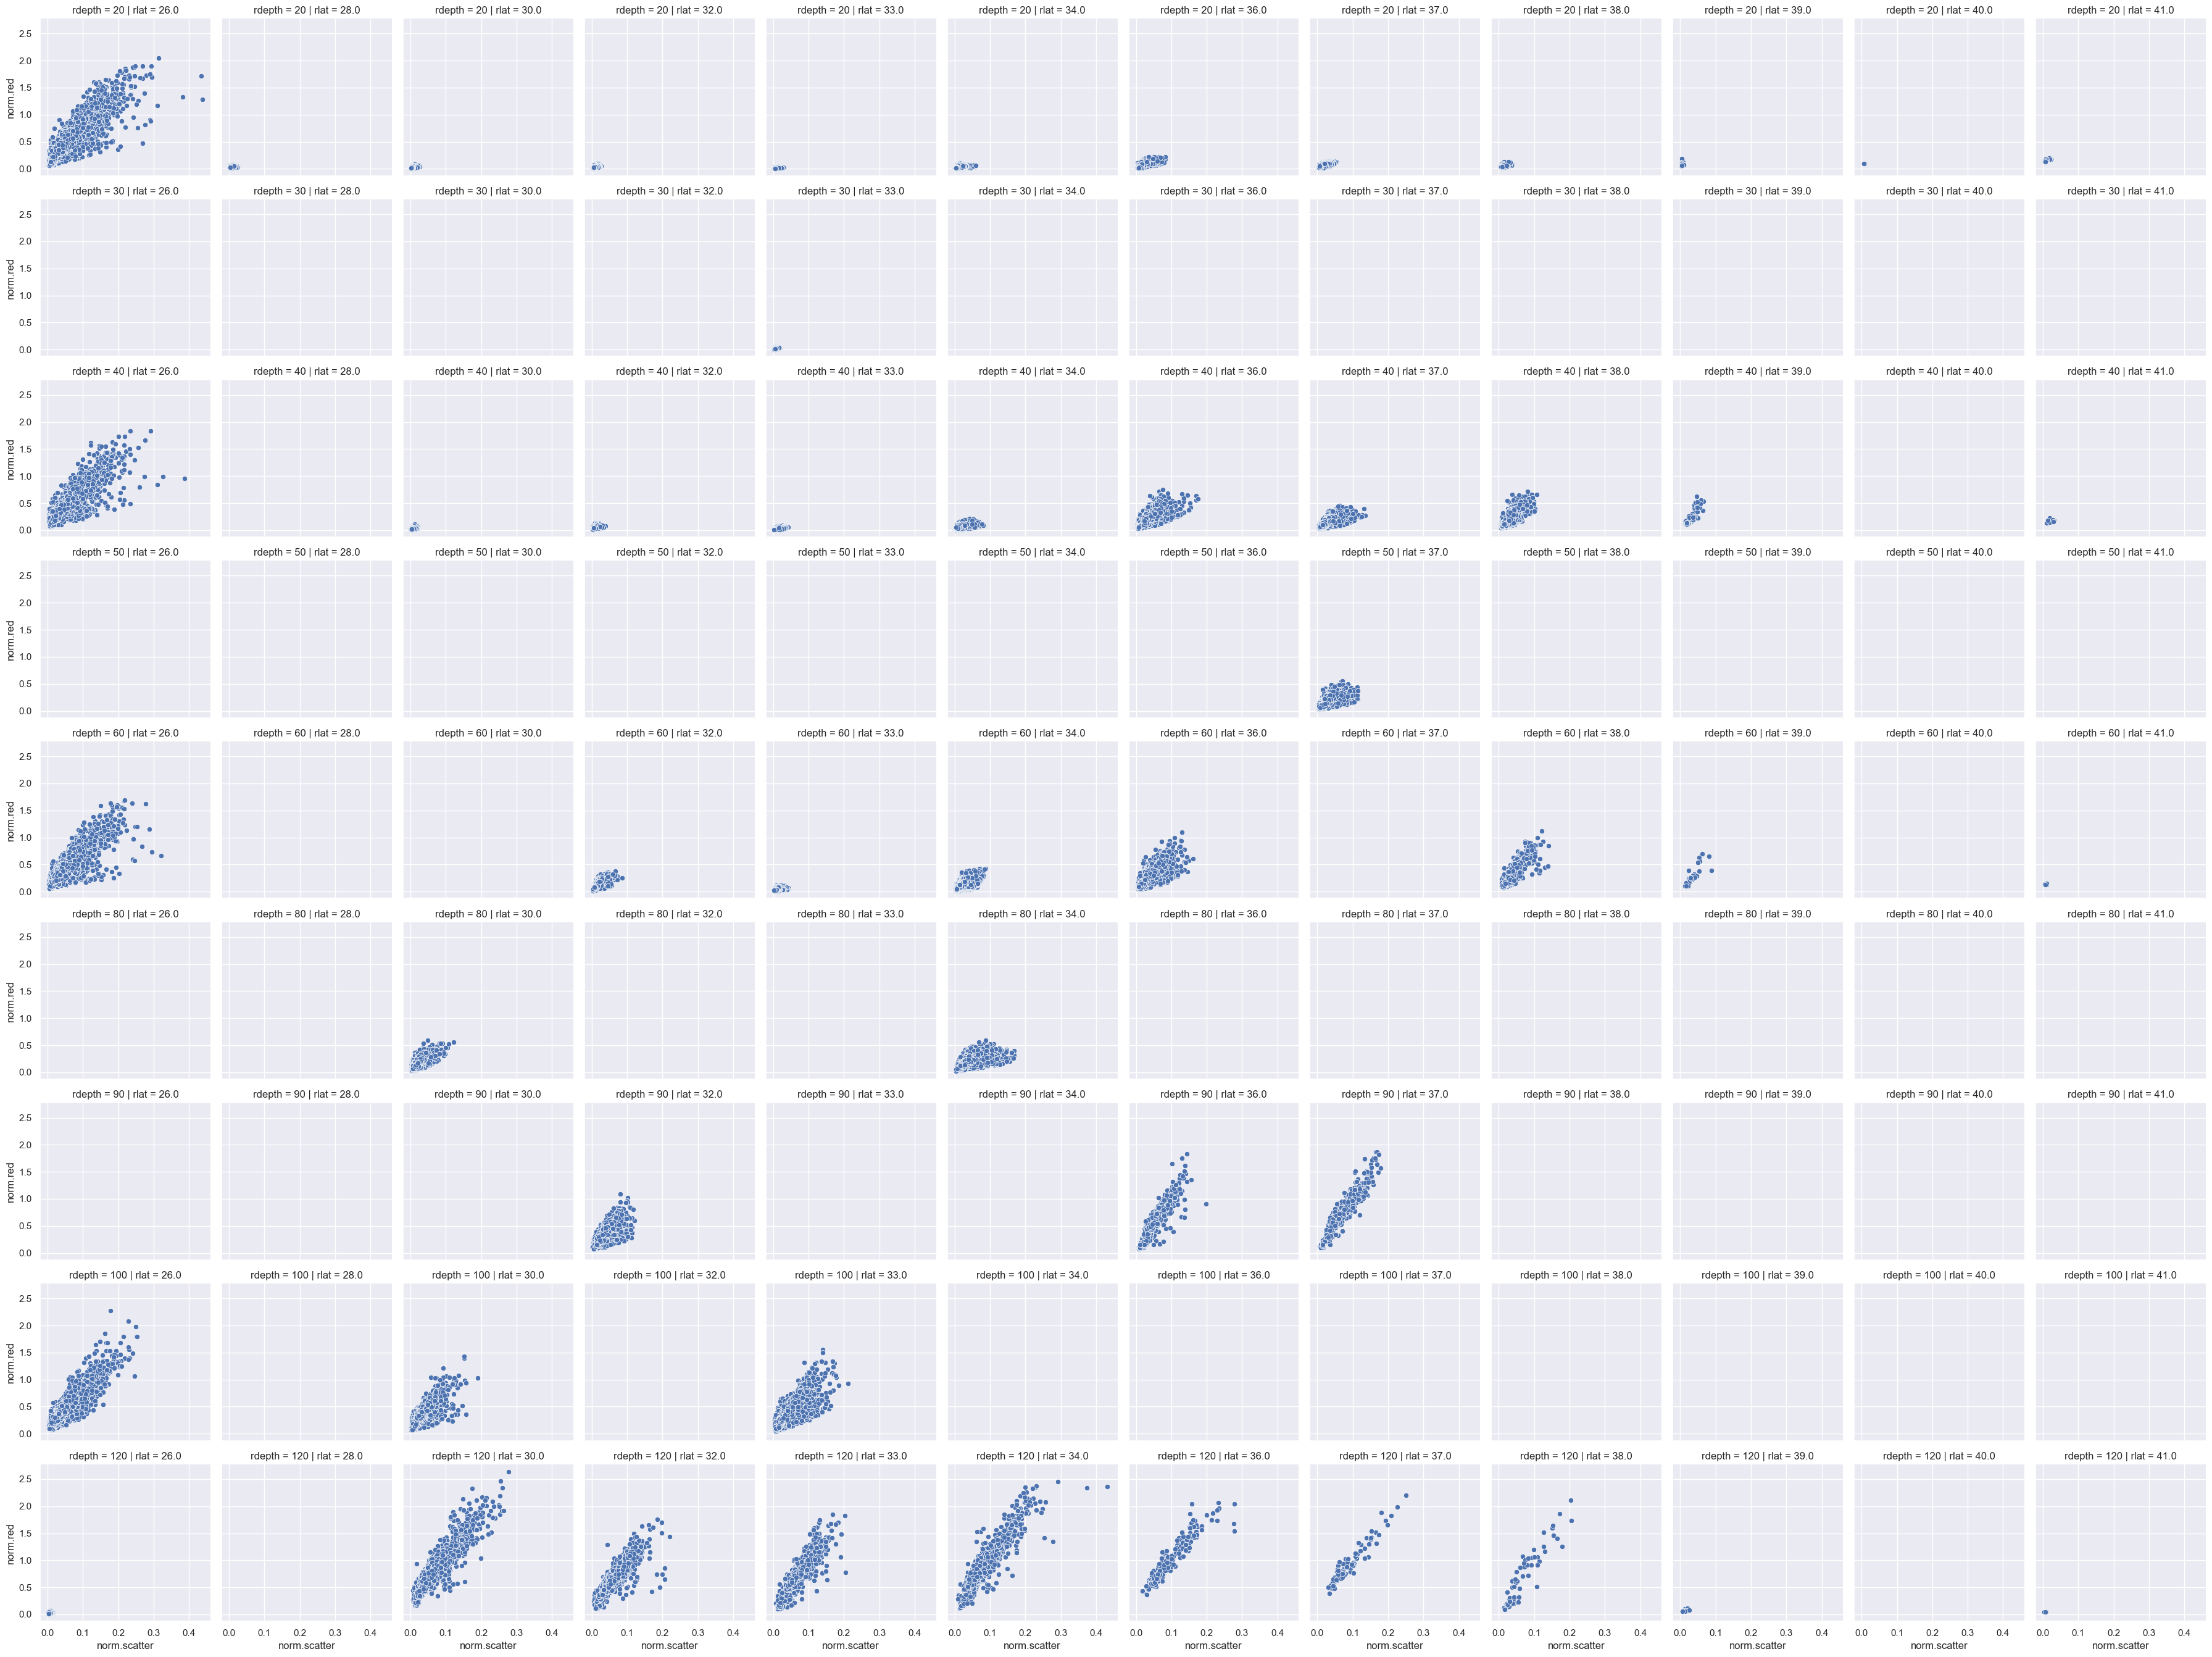

In [28]:
g2 = sns.FacetGrid(g2_pro_fcm, col = 'rlat', row = 'rdepth')
g2.map(sns.scatterplot, 'norm.scatter', 'norm.red')

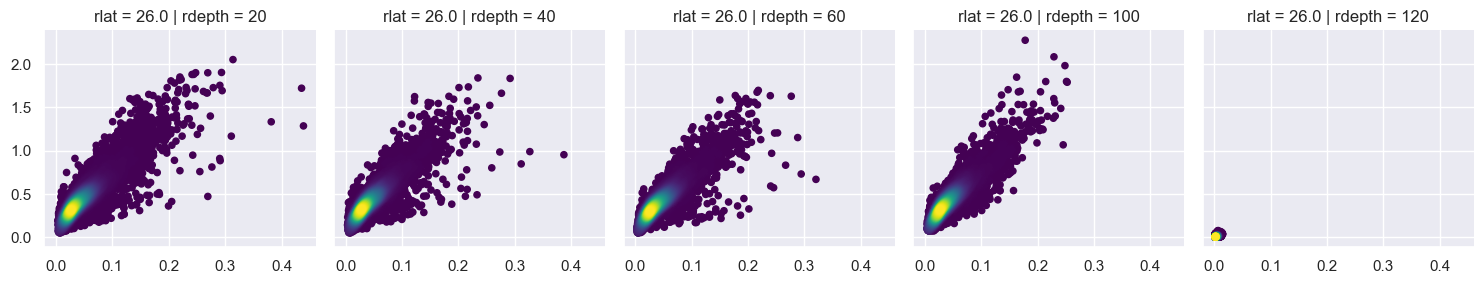

In [29]:
# plotting scatter vs red at latitude 26
lat_26_g2 = g2_pro_fcm.loc[g2_pro_fcm['rlat'] == 26]

g2_26_depths = pd.unique(lat_26_g2['rdepth'])
fg_26_g2 = sns.FacetGrid(lat_26_g2, col = 'rdepth', row = 'rlat')
fg_26_g2.map_dataframe(density_scatter)

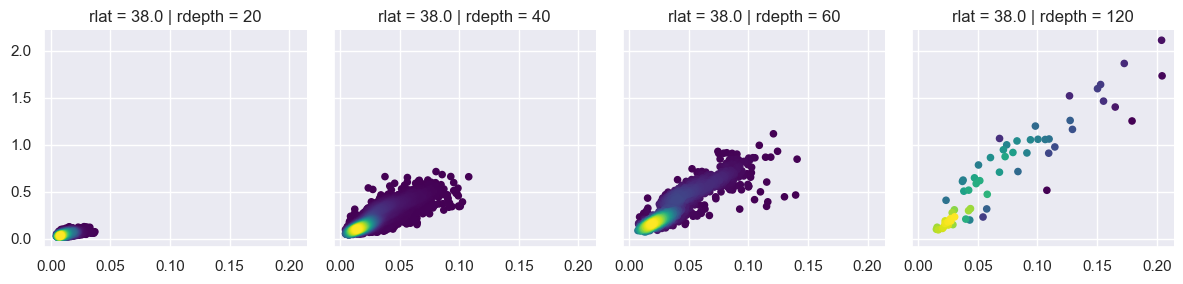

In [30]:
# plotting scatter vs red at latitude 38
lat_38_g2 = g2_pro_fcm.loc[g2_pro_fcm['rlat'] == 38]

g2_38_depths = pd.unique(lat_38_g2['rdepth'])
fg_38_g2 = sns.FacetGrid(lat_38_g2, col = 'rdepth', row = 'rlat')
fg_38_g2.map_dataframe(density_scatter)

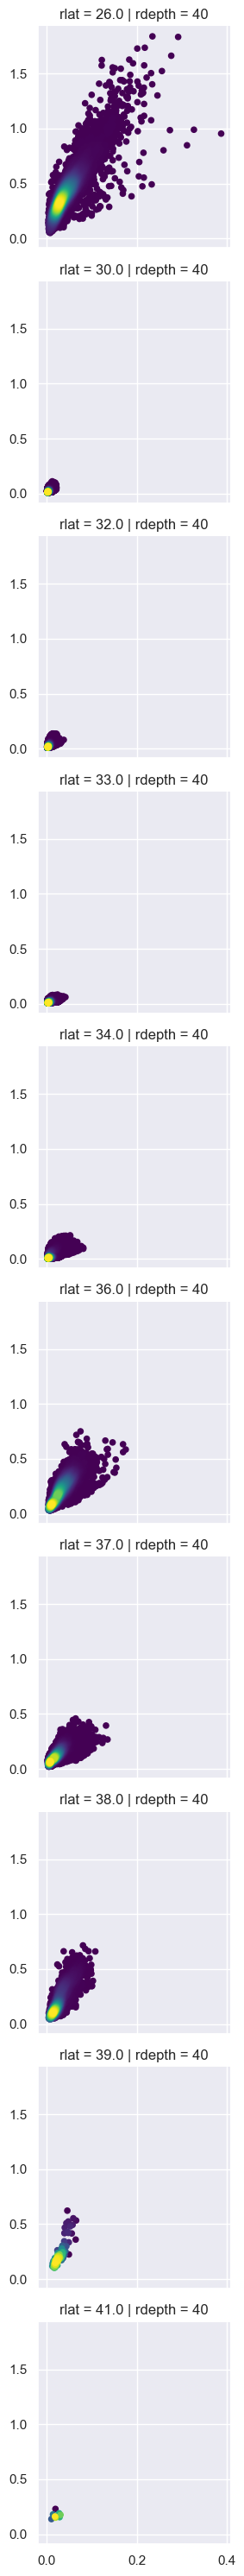

In [31]:
# plotting scatter vs red at depth 40
depth_40_g2 = g2_pro_fcm.loc[g2_pro_fcm['rdepth'] == 40]

g2_40_lats = pd.unique(depth_40_g2['rlat'])
fg_40_g2 = sns.FacetGrid(depth_40_g2, col = 'rdepth', row = 'rlat')
fg_40_g2.map_dataframe(density_scatter)

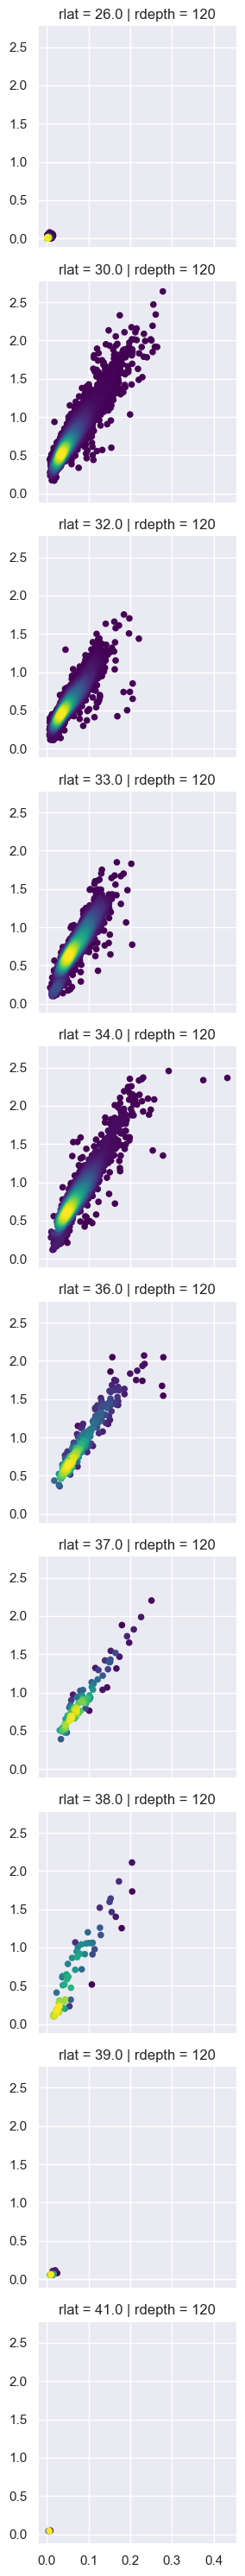

In [32]:
# plotting scatter vs red at depth 120
depth_120_g2 = g2_pro_fcm.loc[g2_pro_fcm['rdepth'] == 120]

g2_120_lats = pd.unique(depth_120_g2['rlat'])
fg_120_g2 = sns.FacetGrid(depth_120_g2, col = 'rdepth', row = 'rlat')
fg_120_g2.map_dataframe(density_scatter)

In [33]:
# obtaining the lats and depths that correspond and has data
_g3_lats = []
_g3_depths = []

for lat in g3_lats:
    for depth in g3_depths:
        fcm_df = g3_pro_fcm.loc[(g3_pro_fcm['rdepth'] == depth) & (g3_pro_fcm['rlat'] == lat)]
        if len(fcm_df) == 0:
            break
        else:
            _g3_lats.append(lat)
            _g3_depths.append(depth)

# organizing the lats and depths of g1
fg_g3_lats = pd.unique(_g3_lats)
fg_g3_lats = np.sort(fg_g3_lats)

fg_g3_depths = pd.unique(_g3_depths)
fg_g3_depths = np.sort(fg_g3_depths)

C:\Users\User\AppData\Local\Temp\ipykernel_27116\587940853.py:15: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fg_g3_lats = pd.unique(_g3_lats)
C:\Users\User\AppData\Local\Temp\ipykernel_27116\587940853.py:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fg_g3_depths = pd.unique(_g3_depths)


In [34]:
# creating an empty dataframe
fg_g3 = pd.DataFrame()

# making a dataframe with only the lats and depths that have data
for lat in fg_g3_lats:
    for depth in fg_g3_depths:
        fcm_df = g3_pro_fcm.loc[(g3_pro_fcm['rdepth'] == depth) & (g3_pro_fcm['rlat'] == lat)]
        if len(fcm_df) == 0:
            break
        else:
            fg_g3 = pd.concat([fg_g3, fcm_df], ignore_index = True)

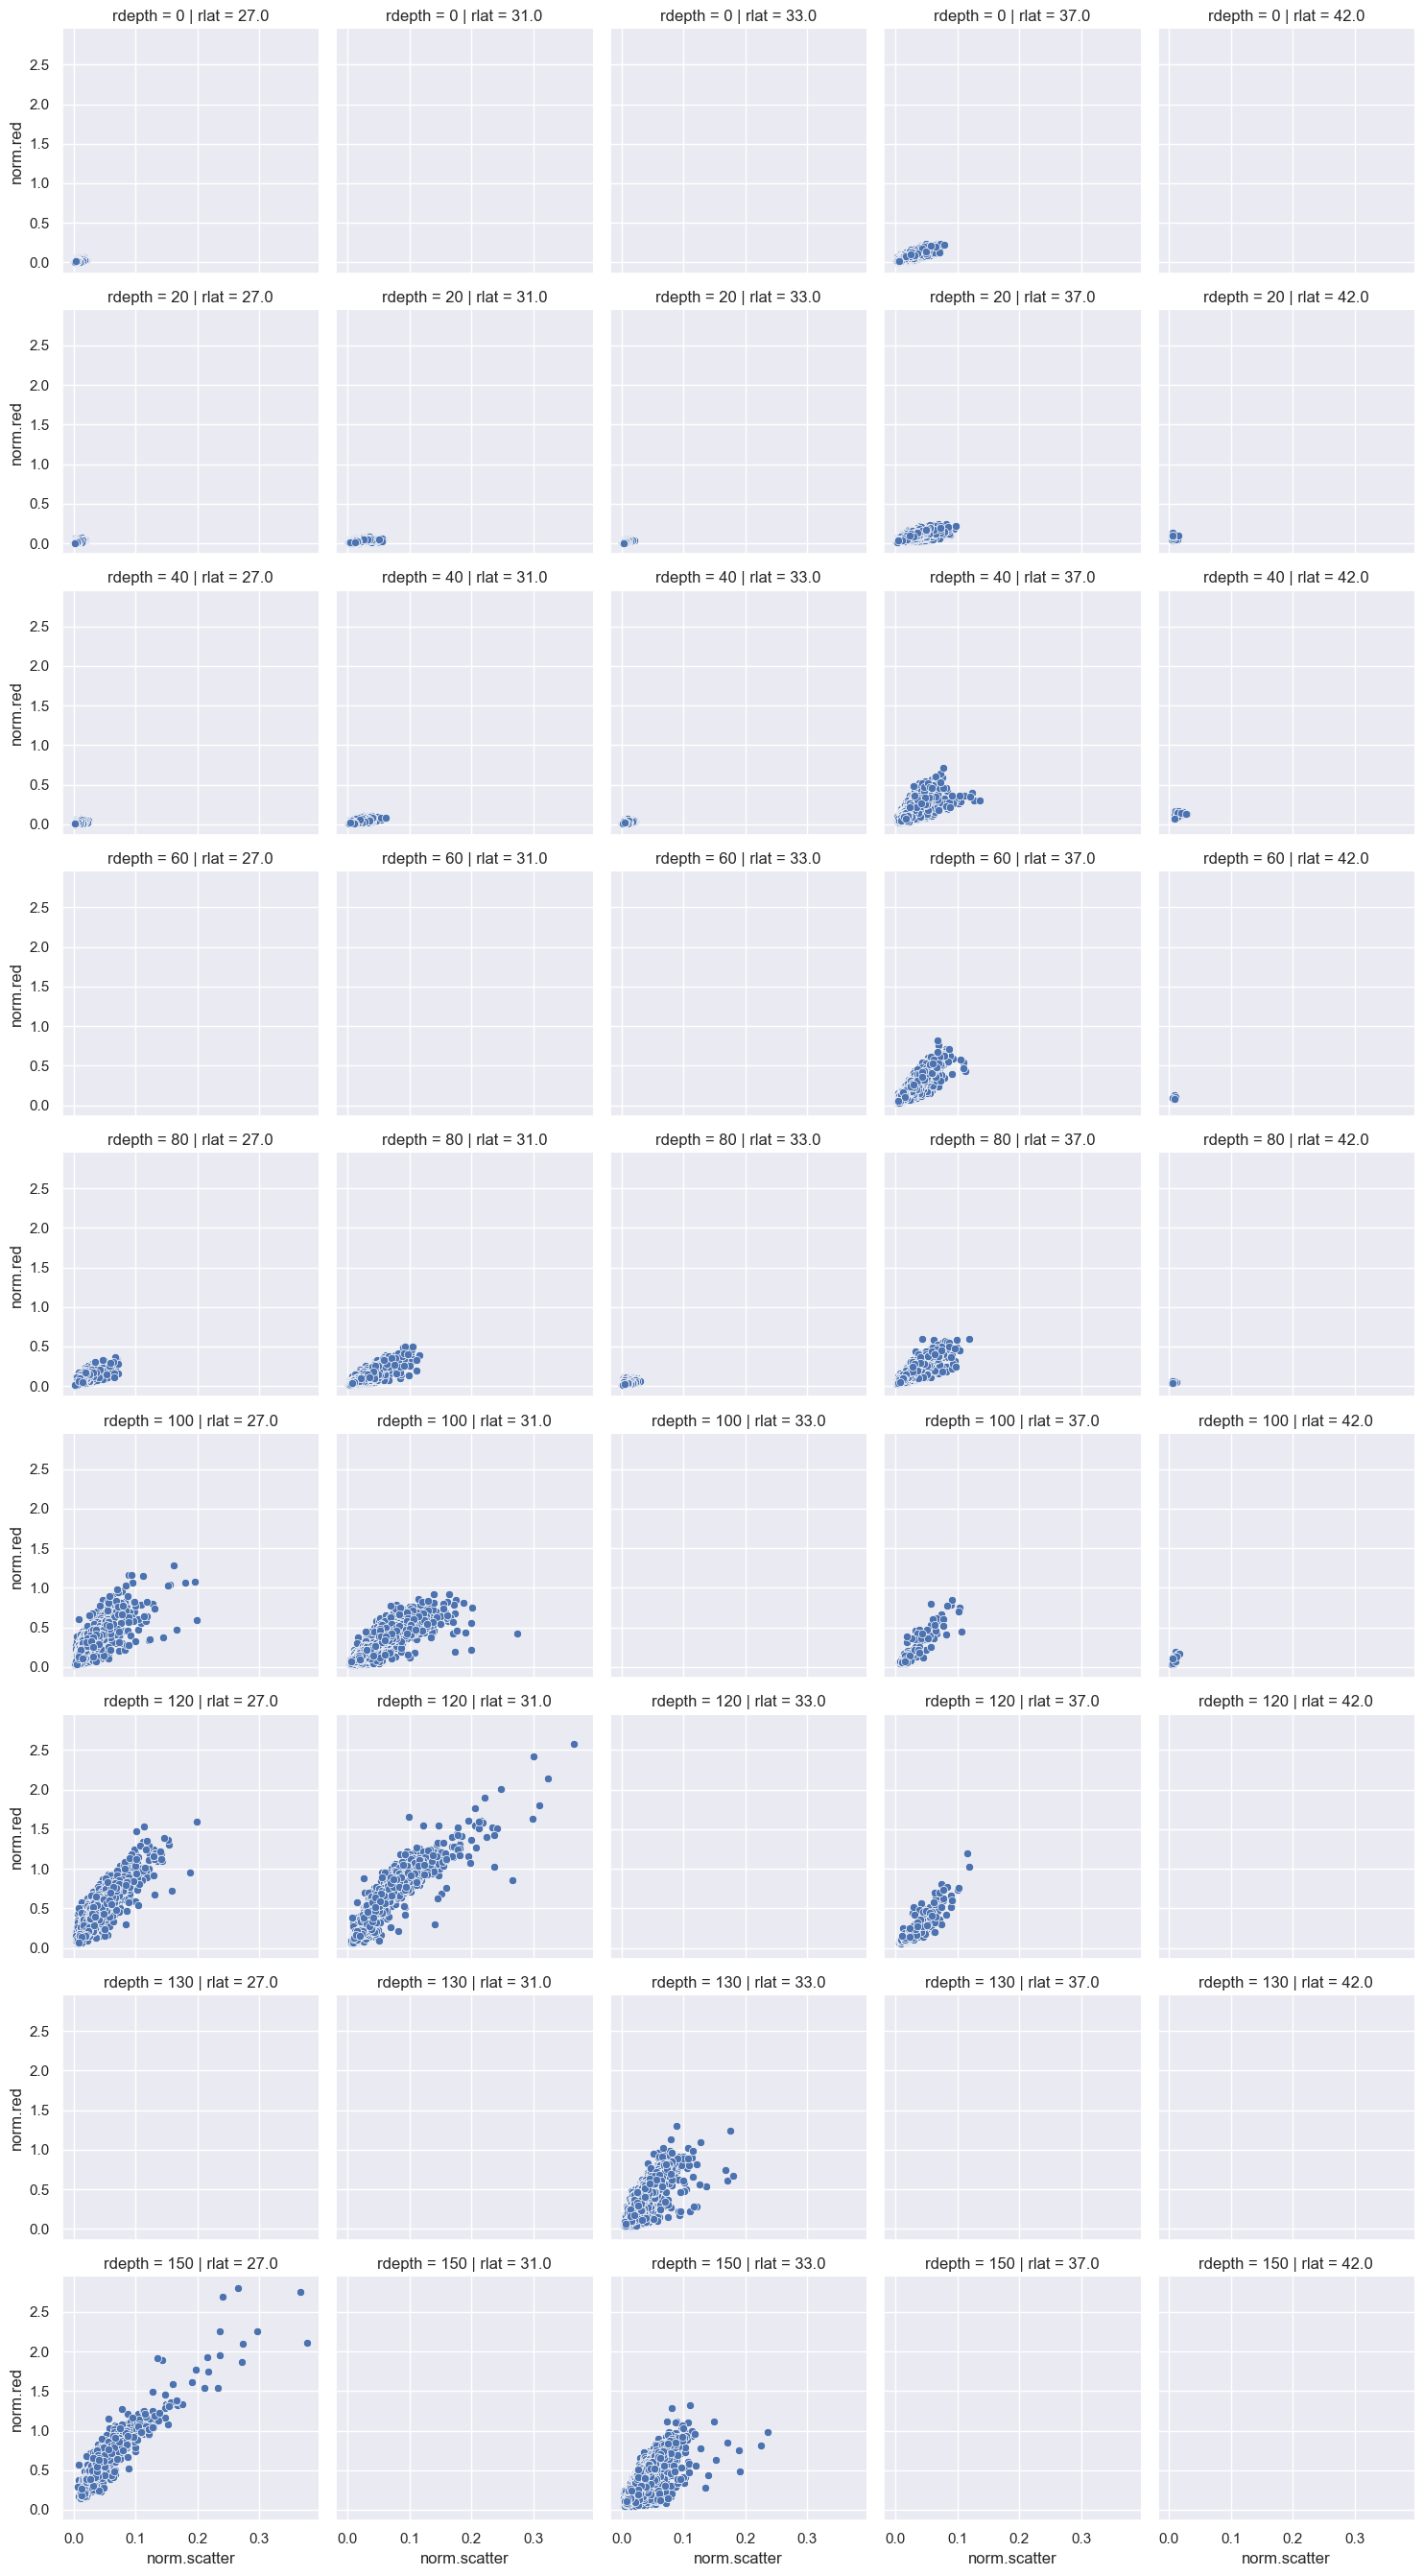

In [36]:
g3 = sns.FacetGrid(g3_pro_fcm, col = 'rlat', row = 'rdepth')
g3.map(sns.scatterplot, 'norm.scatter', 'norm.red')

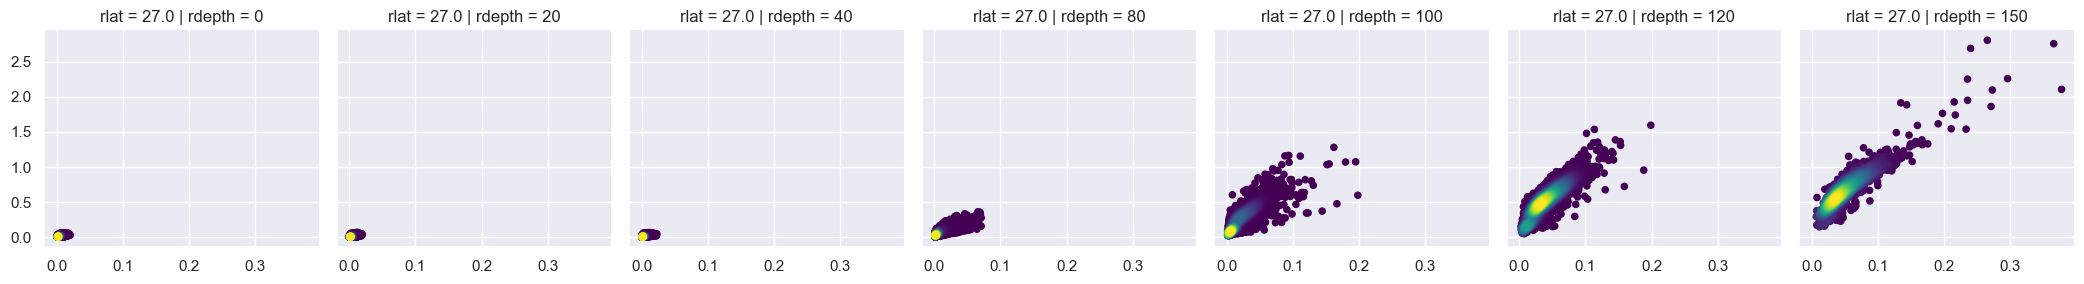

In [37]:
# plotting scatter vs red at latitude 27
lat_27_g3 = g3_pro_fcm.loc[g3_pro_fcm['rlat'] == 27]

g3_27_depths = pd.unique(lat_27_g3['rdepth'])
fg_27_g3 = sns.FacetGrid(lat_27_g3, col = 'rdepth', row = 'rlat')
fg_27_g3.map_dataframe(density_scatter)

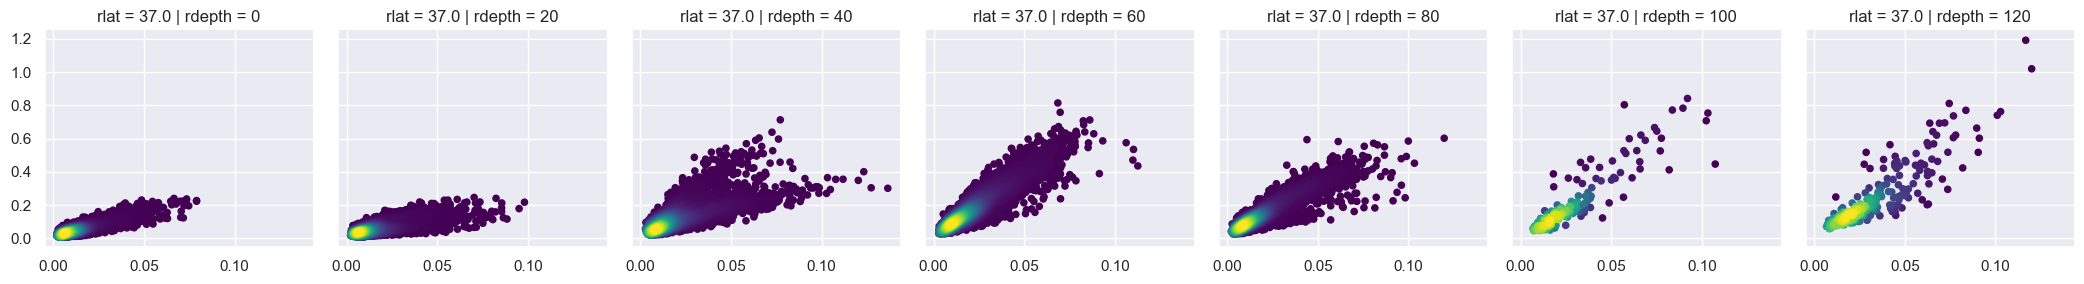

In [38]:
# plotting scatter vs red at latitude 37
lat_37_g3 = g3_pro_fcm.loc[g3_pro_fcm['rlat'] == 37]

g3_37_depths = pd.unique(lat_37_g3['rdepth'])
fg_37_g3 = sns.FacetGrid(lat_37_g3, col = 'rdepth', row = 'rlat')
fg_37_g3.map_dataframe(density_scatter)

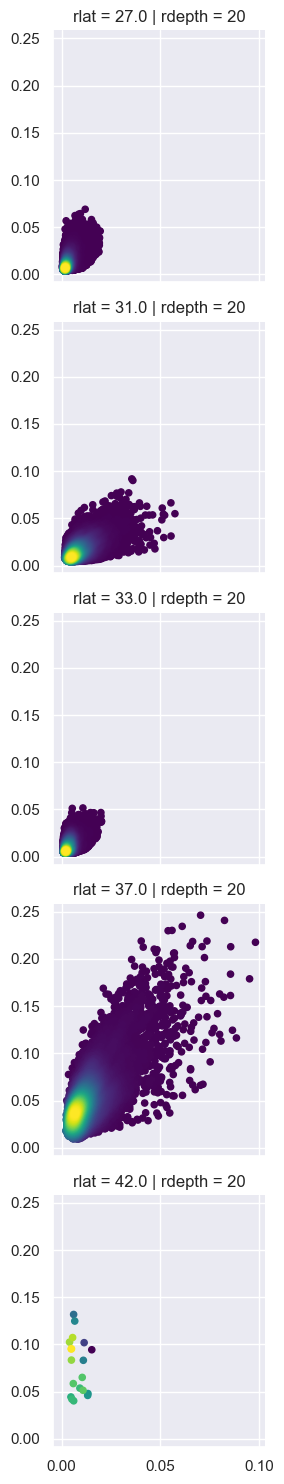

In [39]:
# plotting scatter vs red at depth 20
depth_20_g3 = g3_pro_fcm.loc[g3_pro_fcm['rdepth'] == 20]

g3_20_lats = pd.unique(depth_20_g3['rlat'])
fg_20_g3 = sns.FacetGrid(depth_20_g3, col = 'rdepth', row = 'rlat')
fg_20_g3.map_dataframe(density_scatter)

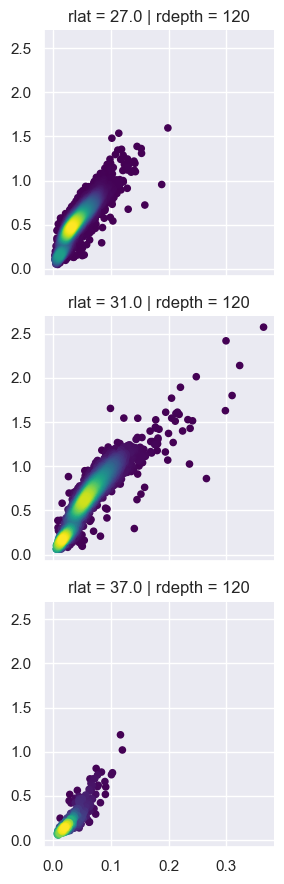

In [40]:
# plotting scatter vs red at depth 20
depth_120_g3 = g3_pro_fcm.loc[g3_pro_fcm['rdepth'] == 120]

g3_120_lats = pd.unique(depth_120_g3['rlat'])
fg_120_g3 = sns.FacetGrid(depth_120_g3, col = 'rdepth', row = 'rlat')
fg_120_g3.map_dataframe(density_scatter)